In [89]:
# Started with imports
import pandas as pd

In [90]:
#And lets read in our Music League data
competitors = pd.read_csv('competitors.csv')
rounds = pd.read_csv('rounds.csv')
submissions = pd.read_csv('submissions.csv')
votes = pd.read_csv('votes.csv')

In [6]:
#Checking competitors
competitors.head()

,ID,Name
0,3f0226c12803401681bb8528ffcbe375,Jeffrey Blitt
1,41173c75c0744b08bdebf53a8a6faf9a,Dean
2,5946dbdca98f489ab0819f9784523ad7,Dalton
3,5d6108a722d84535ab787ea0cbda958f,Jake Sorscher
4,619cf681c25244809e6cbfb0dffe66a1,eestevens0131


In [7]:
#Checking rounds
rounds.head()

,ID,Created,Name,Description,Playlist URL
0,a57cad45e69c4f6da688d02ec1e0a330,2021-06-21T22:21:06Z,Animal Songs,"Song about an animal, has an animal in the tit...",https://open.spotify.com/playlist/3AbXdrryDont...
1,b7ee07c554744044adedf596430c3b64,2021-07-01T01:04:10Z,Songs with a location in the title,NaN,https://open.spotify.com/playlist/4IxbHnTuwc3j...
2,9e67e53f515541cc9ded6fbe26a5356f,2021-07-07T03:54:04Z,Songs with a name in the title,Like a person's name. Just has to be IN the ti...,https://open.spotify.com/playlist/6JkOvj0xsOA1...
3,b6d6c2c8fc754b79ac45454f68873523,2021-07-12T03:15:11Z,Pirate/Ship songs,The dread captain Athreya Ramesh has declared ...,https://open.spotify.com/playlist/3fz7CmOWVB9P...
4,c49edf812e13449e8037c42dff40e66a,2021-07-20T12:23:28Z,It's About Time,Timelord James wants songs related to time! Se...,https://open.spotify.com/playlist/7cpsYBELLuu5...


In [8]:
#Checking submissions
submissions.head()

,Spotify URI,Submitter ID,Created,Comment,Round ID
0,spotify:track:0wP9okoDWmbeC2w9E8ZzPu,716e73d73d444b08b52ccc293c1b0517,2021-06-24T17:00:30Z,"I submit for approval of the board, not only i...",a57cad45e69c4f6da688d02ec1e0a330
1,spotify:track:1ITQbrueGLl581a25XXm9c,a4126addfdc64ee085297b198466afb2,2021-06-22T00:56:35Z,NaN,a57cad45e69c4f6da688d02ec1e0a330
2,spotify:track:3AaiEsiqHO2ylnnOdWninE,89daec8f4d44437b9b6f4328a734c7a4,2021-06-21T22:34:18Z,the animal is obviously shrimp,a57cad45e69c4f6da688d02ec1e0a330
3,spotify:track:4qn3XK6IW2cKjWjSk37t6p,619cf681c25244809e6cbfb0dffe66a1,2021-06-21T23:29:32Z,NaN,a57cad45e69c4f6da688d02ec1e0a330
4,spotify:track:53is1DHKuBWeh4Jx9ISKZp,41173c75c0744b08bdebf53a8a6faf9a,2021-06-22T02:49:07Z,this is real fucking music,a57cad45e69c4f6da688d02ec1e0a330


In [10]:
#Checking votes
votes.head()

,Spotify URI,Voter ID,Created,Points Assigned,Comment,Round ID
0,spotify:track:0wP9okoDWmbeC2w9E8ZzPu,a04dbd780c1e4df59e1617574f1ae4a4,2021-06-28T02:38:04Z,1,NaN,a57cad45e69c4f6da688d02ec1e0a330
1,spotify:track:3AaiEsiqHO2ylnnOdWninE,a04dbd780c1e4df59e1617574f1ae4a4,2021-06-28T02:38:04Z,1,NaN,a57cad45e69c4f6da688d02ec1e0a330
2,spotify:track:7qErExxM8xsfC1cogPTyLj,a04dbd780c1e4df59e1617574f1ae4a4,2021-06-28T02:38:04Z,1,NaN,a57cad45e69c4f6da688d02ec1e0a330
3,spotify:track:1ITQbrueGLl581a25XXm9c,716e73d73d444b08b52ccc293c1b0517,2021-06-28T04:55:14Z,1,NaN,a57cad45e69c4f6da688d02ec1e0a330
4,spotify:track:4qn3XK6IW2cKjWjSk37t6p,716e73d73d444b08b52ccc293c1b0517,2021-06-28T04:55:14Z,1,NaN,a57cad45e69c4f6da688d02ec1e0a330


In [91]:
#Now lets isolate the voter and round IDs as they're the least interpretable data
#Rounds already in competitors
roundsByID = rounds[["ID", "Name"]]

In [92]:
#And see if it worked...
roundsByID.head()

,ID,Name
0,a57cad45e69c4f6da688d02ec1e0a330,Animal Songs
1,b7ee07c554744044adedf596430c3b64,Songs with a location in the title
2,9e67e53f515541cc9ded6fbe26a5356f,Songs with a name in the title
3,b6d6c2c8fc754b79ac45454f68873523,Pirate/Ship songs
4,c49edf812e13449e8037c42dff40e66a,It's About Time


In [93]:
#Now for some coding!
#Want to loop through the elements of the two identifying data frames and replace all instaces of ID with all instances of
#their names instead. If I end up regretting this it's easy to revert. 
for index, row in competitors.iterrows():
    submissions.replace(row['ID'], row['Name'])
#And how'd it work?
submissions.head()

,Spotify_URI,Submitter_ID,Created,Comment,Round_ID
0,spotify:track:0wP9okoDWmbeC2w9E8ZzPu,716e73d73d444b08b52ccc293c1b0517,2021-06-24T17:00:30Z,"I submit for approval of the board, not only i...",a57cad45e69c4f6da688d02ec1e0a330
1,spotify:track:1ITQbrueGLl581a25XXm9c,a4126addfdc64ee085297b198466afb2,2021-06-22T00:56:35Z,NaN,a57cad45e69c4f6da688d02ec1e0a330
2,spotify:track:3AaiEsiqHO2ylnnOdWninE,89daec8f4d44437b9b6f4328a734c7a4,2021-06-21T22:34:18Z,the animal is obviously shrimp,a57cad45e69c4f6da688d02ec1e0a330
3,spotify:track:4qn3XK6IW2cKjWjSk37t6p,619cf681c25244809e6cbfb0dffe66a1,2021-06-21T23:29:32Z,NaN,a57cad45e69c4f6da688d02ec1e0a330
4,spotify:track:53is1DHKuBWeh4Jx9ISKZp,41173c75c0744b08bdebf53a8a6faf9a,2021-06-22T02:49:07Z,this is real fucking music,a57cad45e69c4f6da688d02ec1e0a330


In [94]:
#It didn't! Nice, lets try this to confirm we're doing what we want:
for index, row in competitors.iterrows():
    print(row['ID'], row['Name'])

3f0226c12803401681bb8528ffcbe375 Jeffrey Blitt
41173c75c0744b08bdebf53a8a6faf9a Dean
5946dbdca98f489ab0819f9784523ad7 Dalton
5d6108a722d84535ab787ea0cbda958f Jake Sorscher
619cf681c25244809e6cbfb0dffe66a1 eestevens0131
68016b3ccb0e4780856c4bb8a8d798ed Sam Livermore
716e73d73d444b08b52ccc293c1b0517 James Cameron
89daec8f4d44437b9b6f4328a734c7a4 Lucy
934a2386d8344626ba1d1aafd7108902 Annmarie
a04dbd780c1e4df59e1617574f1ae4a4 William Sherwood
a4126addfdc64ee085297b198466afb2 Sarah
bf2f8fe4ff5147e5b45f3ac75940a1b7 Kate
d2f9038dfd4243b2becf4b7114cc94fe Athreya Ramesh
e3a109c29f194ee5b2ce022672ca72c4 joshy.harvey


In [95]:
#It is, which is even stranger. So let's try to see how replace works on a smaller scale
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
df.replace(11, 999)
df.head()

,c1,c2
0,10,100
1,11,110
2,12,120


In [96]:
#I didn't understand how this worked, found example at https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
#So lets see if this works instead...
for index, row in competitors.iterrows():
    submissions.replace(to_replace = row['ID'], value = row['Name'])
submissions.head()

,Spotify_URI,Submitter_ID,Created,Comment,Round_ID
0,spotify:track:0wP9okoDWmbeC2w9E8ZzPu,716e73d73d444b08b52ccc293c1b0517,2021-06-24T17:00:30Z,"I submit for approval of the board, not only i...",a57cad45e69c4f6da688d02ec1e0a330
1,spotify:track:1ITQbrueGLl581a25XXm9c,a4126addfdc64ee085297b198466afb2,2021-06-22T00:56:35Z,NaN,a57cad45e69c4f6da688d02ec1e0a330
2,spotify:track:3AaiEsiqHO2ylnnOdWninE,89daec8f4d44437b9b6f4328a734c7a4,2021-06-21T22:34:18Z,the animal is obviously shrimp,a57cad45e69c4f6da688d02ec1e0a330
3,spotify:track:4qn3XK6IW2cKjWjSk37t6p,619cf681c25244809e6cbfb0dffe66a1,2021-06-21T23:29:32Z,NaN,a57cad45e69c4f6da688d02ec1e0a330
4,spotify:track:53is1DHKuBWeh4Jx9ISKZp,41173c75c0744b08bdebf53a8a6faf9a,2021-06-22T02:49:07Z,this is real fucking music,a57cad45e69c4f6da688d02ec1e0a330


In [97]:
#Cool, more sanity testing is in order. 
#Lets revisit our above test to see if the replace function can even work when called like that
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
df.replace(to_replace =11, value =999)

,c1,c2
0,10,100
1,999,110
2,12,120


In [98]:
#And does that stay in a new cell?
df.head()

,c1,c2
0,10,100
1,11,110
2,12,120


In [167]:
#NO it doesn't, what in the actual fuck? Interesting, so I have to assign a new dataFrame at each call or something?
#Is the inplace part of the function what I want here?
df = pd.DataFrame({'c1': [10], 'c2': [100]})
df.replace(to_replace =11, value =999, inplace=True)

In [171]:
#Big money no whammy...
df.head()

10

In [101]:
#YES! And now...
for index, row in competitors.iterrows():
    submissions.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
submissions.head()

,Spotify_URI,Submitter_ID,Created,Comment,Round_ID
0,spotify:track:0wP9okoDWmbeC2w9E8ZzPu,James Cameron,2021-06-24T17:00:30Z,"I submit for approval of the board, not only i...",a57cad45e69c4f6da688d02ec1e0a330
1,spotify:track:1ITQbrueGLl581a25XXm9c,Sarah,2021-06-22T00:56:35Z,NaN,a57cad45e69c4f6da688d02ec1e0a330
2,spotify:track:3AaiEsiqHO2ylnnOdWninE,Lucy,2021-06-21T22:34:18Z,the animal is obviously shrimp,a57cad45e69c4f6da688d02ec1e0a330
3,spotify:track:4qn3XK6IW2cKjWjSk37t6p,eestevens0131,2021-06-21T23:29:32Z,NaN,a57cad45e69c4f6da688d02ec1e0a330
4,spotify:track:53is1DHKuBWeh4Jx9ISKZp,Dean,2021-06-22T02:49:07Z,this is real fucking music,a57cad45e69c4f6da688d02ec1e0a330


In [102]:
#Awesome awesome, lets do that for the other datasets real quick...
for index, row in roundsByID.iterrows():
    submissions.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
submissions.head()

,Spotify_URI,Submitter_ID,Created,Comment,Round_ID
0,spotify:track:0wP9okoDWmbeC2w9E8ZzPu,James Cameron,2021-06-24T17:00:30Z,"I submit for approval of the board, not only i...",Animal Songs
1,spotify:track:1ITQbrueGLl581a25XXm9c,Sarah,2021-06-22T00:56:35Z,NaN,Animal Songs
2,spotify:track:3AaiEsiqHO2ylnnOdWninE,Lucy,2021-06-21T22:34:18Z,the animal is obviously shrimp,Animal Songs
3,spotify:track:4qn3XK6IW2cKjWjSk37t6p,eestevens0131,2021-06-21T23:29:32Z,NaN,Animal Songs
4,spotify:track:53is1DHKuBWeh4Jx9ISKZp,Dean,2021-06-22T02:49:07Z,this is real fucking music,Animal Songs


In [103]:
#And for votes...
for index, row in roundsByID.iterrows():
    votes.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
for index, row in competitors.iterrows():
    votes.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
votes.head()

,Spotify_URI,Voter_ID,Created,Points_Assigned,Comment,Round ID
0,spotify:track:0wP9okoDWmbeC2w9E8ZzPu,William Sherwood,2021-06-28T02:38:04Z,1,NaN,Animal Songs
1,spotify:track:3AaiEsiqHO2ylnnOdWninE,William Sherwood,2021-06-28T02:38:04Z,1,NaN,Animal Songs
2,spotify:track:7qErExxM8xsfC1cogPTyLj,William Sherwood,2021-06-28T02:38:04Z,1,NaN,Animal Songs
3,spotify:track:1ITQbrueGLl581a25XXm9c,James Cameron,2021-06-28T04:55:14Z,1,NaN,Animal Songs
4,spotify:track:4qn3XK6IW2cKjWjSk37t6p,James Cameron,2021-06-28T04:55:14Z,1,NaN,Animal Songs


In [145]:
#Awesome start, let's start thinking of ways to divide this up.
#Let's make a function - takes in a Voter's name and outputs all the songs they've voted for
def songsVotedFor(voterName, sourceDF):
#    cols = ['Spotify_URI', 'Voter_ID']
#     newDF = inputDF[cols]
#     newDF[newDF.Voter_ID.str.contains(voterName)]
    newDF = sourceDF.query('Voter_ID == "' + voterName + '"')
    returnArr = []
    for index, row in newDF.iterrows():
        returnArr.append(row['Spotify_URI'])
    returnArr = list(set(returnArr))
    return returnArr

In [146]:
#And lets try our function out
willVotes = songsVotedFor("William Sherwood", votes)
print(willVotes)

['spotify:track:6VUMlHTs06O4tvQTpuboVR', 'spotify:track:4ylE1Sl2wohbCvToD1fHsl', 'spotify:track:7dUCFnaGSWLH6SdDP08NLP', 'spotify:track:0EodzyGsPuqU6BrW6wkFQE', 'spotify:track:7qErExxM8xsfC1cogPTyLj', 'spotify:track:0HU6iAeBwxODFxkiRMTgF1', 'spotify:track:0owmJNkGcGNq4hb6qt3ufd', 'spotify:track:3Dv1eDb0MEgF93GpLXlucZ', 'spotify:track:0LP2DlqqEH5Lo0ujWdHkUD', 'spotify:track:6UDFkqHY5gLREnSh9jd5th', 'spotify:track:41yIvlFgvGwxq8qTqAR7eG', 'spotify:track:72ysGFB4mZTgQsPqN9PzPS', 'spotify:track:6w4KcqHYBff2CXKtAVigtl', 'spotify:track:2He9deEfdXYWxnTUi0oOb0', 'spotify:track:2iDYHPLh9TOhDpknFZXPjD', 'spotify:track:1KlDcHrlDPUJJPmMup3tUp', 'spotify:track:0Y4xg5612xZ3vAgWEkMjw3', 'spotify:track:5lLiVVtap1z4PoeWe6mNMG', 'spotify:track:3oQomOPRNQ5NVFUmLJHbAV', 'spotify:track:2uzyiRdvfNI5WxUiItv1y9', 'spotify:track:6iOQIQleZKnvWbPu9LZLnY', 'spotify:track:6E4GwulavAVwwMph9ePPh6', 'spotify:track:7etPhiKxGfTihLqeDnvo9w', 'spotify:track:5xrtzzzikpG3BLbo4q1Yul', 'spotify:track:34Iz2YaDtsHzcxKcFYywnz',

In [148]:
#Lets get some info about this array, something is awry
x = len(willVotes)
print(x)
flag = 0

# # Python3 code to demonstrate 
# # to test all elements in list are unique
# # using set() + len()
  
# # initializing list 
# test_list = willVotes
  
# # printing original list 
# print ("The original list is : " + str(test_list))
  
# flag = 0
  
# # using set() + len()
# # to check all unique list elements
# flag = len(set(test_list)) == len(test_list)
  
  
# # printing result
# if(flag) :
#     print ("List contains all unique elements")
# else : 
#     print ("List contains does not contains all unique elements")

# willVotes = list(set(willVotes))
# x = len(willVotes)
# print(x)

68
68


In [215]:
#LOTS of debugging there but we got something! Now lets make a function that takes an array of songs and returns a dataframe
#of who they voted for.
def songTally(songArr, searchDF):
    countArr = [0] * 14
    pplArr = ["Jeffrey Blitt", "Dean", "Dalton", "Jake Sorscher", "eestevens0131", "Sam Livermore", "James Cameron", "Lucy", "Annmarie", "William Sherwood", "Sarah", "Kate", "Athreya Ramesh", "joshy.harvey"]
    ctr = 0
    for songID in songArr:
        newDF = searchDF.query('Spotify_URI == "' + songID + '"')
        for index, name in enumerate(pplArr):
            if name == newDF.iloc[0]['Submitter_ID']:
                countArr[index] += 1
    voteDict = dict(zip(pplArr, countArr))
    return pd.DataFrame(voteDict.items(), columns=['Person', 'Votes'])
    #return voteDict
    #return pd.DataFrame.from_dict(voteDict, index=pplArr)


In [216]:
#And the testing block...
willDF = songTally(willVotes, submissions)
willDF.head()

,Person,Votes
0,Jeffrey Blitt,7
1,Dean,2
2,Dalton,9
3,Jake Sorscher,6
4,eestevens0131,10


In [223]:
#my god im insane that was hard okokokokok lets try graphs
import matplotlib.pyplot as mpl
import seaborn as sbrn
# from matplotlib.pyplot import figure

# figure(figsize=(16, 6), dpi=80)
mpl.rcParams["figure.figsize"] = (20,5)

<AxesSubplot:title={'center':"Will's Music League Votes"}, xlabel='Person'>

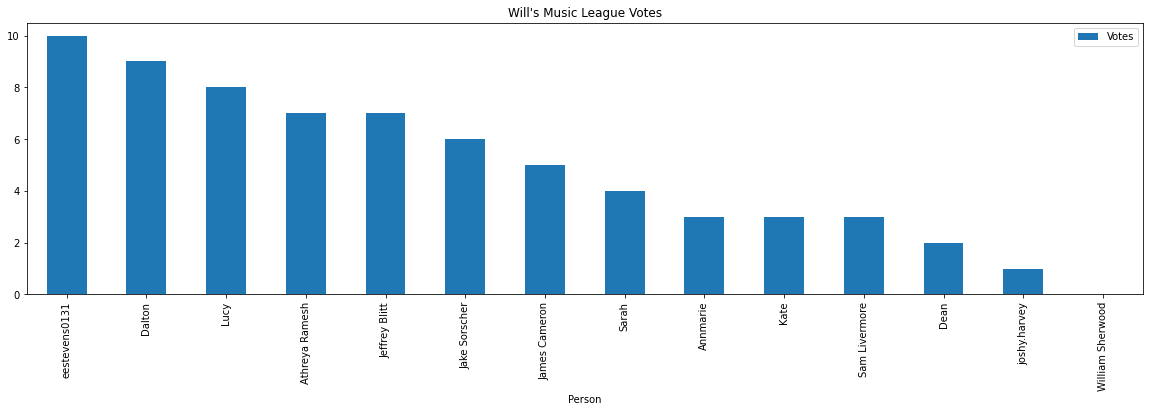

In [227]:
#Simplest graph I could find
# keys = willDict.keys()
# values = willDict.values()

# fig = mpl.bar(keys, values)
willDF.groupby(['Person']).median().sort_values("Votes", ascending=False).plot.bar(title="Will's Music League Votes")

In [1]:
#And we've actually done it! Now to just compress this all into a single cell so that it's human fucking readable.

#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sbrn
import zipfile

#Adjust figure size so graph produced is readable
mpl.rcParams["figure.figsize"] = (20,5)

#Unzip new Music League data
with zipfile.ZipFile('export.zip', 'r') as zip_ref:
    zip_ref.extractall()

#Import CSV files
competitors = pd.read_csv('competitors.csv')
rounds = pd.read_csv('rounds.csv')
submissions = pd.read_csv('submissions.csv')
votes = pd.read_csv('votes.csv')

#Change column names to be more code-friendly
competitors.columns = competitors.columns.str.replace(' ','_')
rounds.columns = rounds.columns.str.replace(' ','_')
submissions.columns = submissions.columns.str.replace(' ','_')
votes.columns = votes.columns.str.replace(' ','_')

#Global Vars
pplArr = ["Jeffrey Blitt", "Dean", "Dalton", "Jake Sorscher", "eestevens0131", "Sam Livermore", "James Cameron", "Lucy", "Annmarie", "William Sherwood", "Sarah", "Kate", "Athreya Ramesh", "joshy.harvey"]
    #Array of competitor names for the "Rat King" music league, use to input into songsVotedFor
PERSON_SELECTED = "Dean"
    #String, input one of the above into it to create their graph

#Function: songsVotedFor
#Returns: list
#Input: voterName (str, name of competitor), sourceDF (dataframe, created from votes.csv)
#Contract: Uses sourceDF to create a string of every song voted for by voterName

def songsVotedFor(voterName, sourceDF):
    #Create new dataframe withn only rows of voterName
    queryString = 'Voter_ID == "' + voterName + '"'
    newDF = sourceDF.query(queryString)
    songList = []
    #Add songs from this into array
    for index, row in newDF.iterrows():
        songList.append(row['Spotify_URI'])
    songList = list(set(songList))
    return songList

#Function: tallyVotes
#Returns: dataframe
#Input: songArr (array of Spotify URI strings), searchDF (dataframe, created from submissions.csv)
#Contract: Searches song submissions in searchDF, crossreferencing with songArr to count how many votes were given to which person

def tallyVotes(songArr, searchDF):
    #Create a counter that tracks votes for each person
    countArr = [0] * 14
    for songID in songArr:
        #Extracts songs matching entries in songArr from searchDF
        newDF = searchDF.query('Spotify_URI == "' + songID + '"')
        #If the submitter for a given song is in pplArr, increment their counter
        for index, name in enumerate(pplArr):
            if name == newDF.iloc[0]['Submitter_ID']:
                countArr[index] += 1
    #Aligns the peron's counters with their names
    voteDict = dict(zip(pplArr, countArr))
    return pd.DataFrame(voteDict.items(), columns=['Person', 'Votes'])


#----------------------------------------------------------------------------------------------------------------

#Create a new dataframe that contains a mapping of internal Round IDs to Round Names
roundsByID = rounds[["ID", "Name"]]

#Replace internal ids with names in the 'submissions' dataset
for index, row in competitors.iterrows():
    submissions.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
for index, row in roundsByID.iterrows():
    submissions.replace(to_replace = row['ID'], value = row['Name'], inplace=True)

#Replace internal ids with names in the 'votes' dataset    
for index, row in roundsByID.iterrows():
    votes.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
for index, row in competitors.iterrows():
    votes.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
    
#Create the list of songs that PERSON_SELECTED voted for
songVotes = songsVotedFor(PERSON_SELECTED, votes)

#Create the dataframe of tallied votes
voteDF = tallyVotes(songVotes, submissions)

#Create graph from this dataframe
voteDF.groupby(['Person']).median().sort_values("Votes", ascending=False).plot.bar(title=PERSON_SELECTED + "'s Music League Votes")

UndefinedVariableError: name 'Voter_ID' is not defined